In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("loan.csv")

In [89]:
data

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,23750.0,11.0019,B,Civil Servant,<=5 years,MORTGAGE,98000.0,2010-01-14,0,Other,12.0,2010-11-03,NaN
9996,9996,11880.0,10.4923,B,Civil Servant,<=5 years,RENT,36270.0,2015-03-20,0,Debt consolidation,17.0,2016-01-26,NaN
9997,9997,19950.0,8.4364,B,Accountant,>5 years,OWNER,52250.0,2015-04-03,0,Debt consolidation,9.0,2015-12-12,NaN
9998,9998,4850.0,13.6409,C,Bus driver,>5 years,RENT,80040.0,2014-11-23,0,Debt consolidation,26.0,2016-01-01,NaN


In [90]:
data["date_issued"].dtype

dtype('O')

In [91]:
data["date_issued"]=pd.to_datetime(data["date_issued"])

In [92]:
data["date_issued"].dtype

dtype('<M8[ns]')

In [93]:
data["month"]=data["date_issued"].dt.month

In [94]:
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,month
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,6
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,5
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,10
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,8
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,7


In [95]:
data["year"]=data["date_issued"].dt.year

In [96]:
data.head(4)

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,month,year
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,6,2013
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,5,2014
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,10,2013
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,8,2015


In [97]:
data.groupby(["month","year","market"])["disbursed_amount"].sum().unstack()

market              A           B           C           D          E
month year                                                          
1     2008    11360.0         NaN         NaN         NaN   14136.25
      2009     9400.0    13650.00         NaN         NaN        NaN
      2010    13050.0    74710.00    19655.00    24115.00    4656.00
      2011    79887.5    42233.50    28760.00    47100.00   23040.00
      2012    94328.0   102486.25    35616.00    41760.00   33950.00
...               ...         ...         ...         ...        ...
12    2011    65783.0   108336.25   102744.00    54780.00   53331.00
      2012   206788.5   200994.75   265656.00   138606.25   55202.00
      2013   297512.0   710690.25   637190.00   324092.25  204496.75
      2014   229219.0   518491.00   381353.00   357470.75  150018.25
      2015  1094781.5  1775188.00  1941545.75  1083162.50  871467.50

[99 rows x 5 columns]

In [98]:
data1=pd.read_csv("train.csv")

In [99]:
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [100]:
for i in data1.columns:
    print(i,data1[i].isnull().mean())

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 0.1773972602739726
LotArea 0.0
Street 0.0
Alley 0.9376712328767123
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.5972602739726027
MasVnrArea 0.005479452054794521
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinSF1 0.0
BsmtFinType2 0.026027397260273973
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.0006849315068493151
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
Fir

In [101]:
data1["Alley"].isnull().groupby(data1["SalePrice"]).mean()

SalePrice
34900     1.0
35311     1.0
37900     1.0
39300     1.0
40000     0.0
         ... 
582933    1.0
611657    1.0
625000    1.0
745000    1.0
755000    1.0
Name: Alley, Length: 663, dtype: float64

In [102]:
data1["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [103]:
data.head(4)

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,month,year
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,6,2013
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,5,2014
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,10,2013
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,8,2015


In [104]:
titanic=pd.read_csv("titanic.csv")

In [105]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [106]:
titanic[(titanic["survived"]==1) & (titanic["age"]>50) & (titanic["age"]<60)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
33,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio"
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA"
48,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51,C,3,NaN,"Germantown, Philadelphia, PA"
79,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,2,NaN,"New York, NY"
86,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,5 9,NaN,"Lima, Peru"
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,13,NaN,"San Francisco, CA"
95,1,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S,5,NaN,"San Francisco, CA"
104,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA"


In [107]:
titanic["cabin"].isnull().groupby(titanic["survived"]).mean()

survived
0    0.873918
1    0.614000
Name: cabin, dtype: float64

In [108]:
data1["Alley"].isnull().groupby(data1["SalePrice"]).mean()

SalePrice
34900     1.0
35311     1.0
37900     1.0
39300     1.0
40000     0.0
         ... 
582933    1.0
611657    1.0
625000    1.0
745000    1.0
755000    1.0
Name: Alley, Length: 663, dtype: float64

In [109]:
data1["Alley"].dropna().unique()

array(['Grvl', 'Pave'], dtype=object)

In [110]:
titanic["cabin"].isnull().groupby(titanic["survived"]).mean()

survived
0    0.873918
1    0.614000
Name: cabin, dtype: float64

In [111]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
data1["Alley_null"]=np.where(data1["Alley"].isnull(),1,0)

In [113]:
data1.groupby(["SalePrice"])["Alley_null"].mean()

SalePrice
34900     1.0
35311     1.0
37900     1.0
39300     1.0
40000     0.0
         ... 
582933    1.0
611657    1.0
625000    1.0
745000    1.0
755000    1.0
Name: Alley_null, Length: 663, dtype: float64

In [115]:
data1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_null
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,1
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,1
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,1
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,1


In [121]:
from scipy import stats
def fitness(data,var):
    plt.subplot(1,3,1)
    sns.histplot(data[var])
    
    plt.subplot(1,3,2)
    stats.probplot(data[var],dist="norm",plot=plt)
    plt.show()
    plt.subplot(1,3,3)
    sns.boxplot(y=data[var])
    plt.show()
    


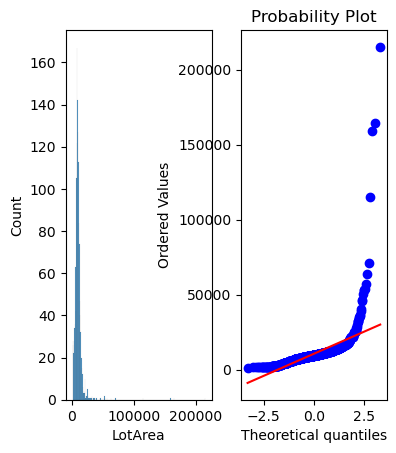

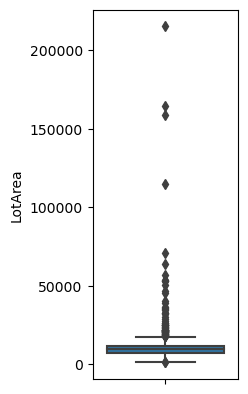

In [123]:
fitness(data1,"LotArea")

In [126]:
iqr=data1["LotArea"].quantile(0.75)-data1["LotArea"].quantile(0.25)
upper=data1["LotArea"].quantile(0.75)+(iqr*3)
lower=data1["LotArea"].quantile(0.25)-(iqr*3)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley_null
